In [43]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Import and call helper functions

Helper functions that automate the joining of the appropriate dataframes.

In [85]:
from revisionTesthelper_functions import *  #This is the function that seems to work with this notebook!
# from get_total_movie_info import *
# from helper_functions import *

In [45]:
df = get_clean_df()

William Friedkin
David Cronenberg
Allison Anders
Barry Levinson
Rodney Bennett
Jay Russell
Jake Kasdan
Ray Lawrence
Taylor Hackford
Frank Marshall
nan
nan
nan
William Friedkin
Peter Baldwin
George Hickenlooper
nan
Rick Rosenthal
Carl Erik Rinsch
Jim Jarmusch
nan
nan
Martyn Burke
Keith Gordon
John Woo
Michael Polish
Roy Ward Baker
David Arquette
John Sayles
Ken Loach
nan
William Wellman
Pauly Shore
Steve Boyum
Peter Cattaneo
Edward Dmytryk
Andy Sidaris
Ivan Nagy
Terence Young
Jon Turteltaub
nan
Paolo Sorrentino
Henning Schellerup
Allen Hughes|Albert Hughes
nan
Woody Allen
Yimou Zhang
Bill Froehlich
James Wong
nan
Pat Proft
Kevin Lima
Niels Arden Oplev
Matt Bettinelli-Olpin|Tyler Gillett
Anatole Litvak
Ira Miller
Steven Spielberg
Alan Alda
Otto Preminger
Terry Jones
Patrick Lussier
Tom Hanks
James Gray
Werner Herzog
Richard Kelly
Roy Rowland
nan
Ted Tetzlaff
William Beaudine
Bruce Beresford
nan
nan
Herbert Wilcox
John Gilling
Ernst Lubitsch
Cheryl Dunye
Ben Younger
Richard Linklater
Alan

Michael Brown
Arthur Hiller
Mervyn Le Roy
Steven Spielberg
nan
Werner Herzog
Tim Disney
Alfred Hitchcock
Peter Webber
Joel Schumacher
Ang Lee
Prince
Austin Chick
Richard Lester|Richard Donner
Wiktor Grodecki
Mark Robson
Jed Weintrob
nan
Nicolas Roeg
Steve Kloves
Anthony Russo|Joe Russo
Harmony Korine
nan
Scott Pembroke
Vittorio De Sica
Irene Lusztig
Barbra Streisand
Renny Harlin
Paul Flaherty
Robert Pulcini|Shari Springer Berman
Amos Poe
Max Joseph
Sean McNamara
Barra Grant
Joseph Kane
nan
Jay Roach
Richard Rush
Charles Shyer
Lloyd Bacon
Amy Holden Jones
Richard Michaels|Michael Daves
Daniel Alfredson
Eric England
Nathan Juran
nan
Walter Lang
Barry Levinson
Jacques Cluzaud|Jacques Perrin
Simon West
James Cameron
nan
nan
Jan Hrebejk
Bobcat Goldthwait
Michael Lehmann
George Cukor
Marion Vernoux
Silvio Narizzano
Ian Curteis
Charles Walters
Fielder Cook
Phil Alden Robinson
Robert Redford
Howard Hawks
David Seltzer
John Krasinski
Rob Cohen
nan
Danny Boyle
Aditya Chopra
Peter Byck
Henry Jagl

In [46]:
df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,writer,theater_date,dvd_date,currency,box_office,runtime,studio_y,year_y,clean_domestic_gross,clean_worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21569509.0,22885836.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75605492.0,111300835.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32746941.0,108660270.0
4,tt6096334,6.4,5,Here After,Here After,2018,71.0,Documentary,1,hereafter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32746941.0,108660270.0


In [47]:
df.columns

Index(['movie_id', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'ordering',
       'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'id_x', 'release_date', 'production_budget',
       'domestic_gross_movie_budgets', 'worldwide_gross_movie_budgets',
       'studio_x', 'domestic_gross_movie_gross', 'foreign_gross_movie_gross',
       'year_x', 'primary_name', 'id_y', 'synopsis', 'rating', 'genre',
       'director', 'writer', 'theater_date', 'dvd_date', 'currency',
       'box_office', 'runtime', 'studio_y', 'year_y', 'clean_domestic_gross',
       'clean_worldwide_gross'],
      dtype='object')

### Split and explode the genres column to sepperate movies that are listed with more than one genre.

In [49]:
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres').reset_index(drop=True)

### Describe the gross income column that will be used for analysis.

In [56]:
df['clean_domestic_gross'].describe()

count    4.208000e+03
mean     5.330818e+07
std      8.259545e+07
min      0.000000e+00
25%      1.594798e+06
50%      2.462269e+07
75%      6.406301e+07
max      7.000596e+08
Name: clean_domestic_gross, dtype: float64

### Optional: Normalized the gross column as a new dataframe

In [59]:
normalized_df = df['Norm_clean_domestic_gross']=(df['clean_domestic_gross']-df['clean_domestic_gross'].mean())/df['clean_domestic_gross'].std()

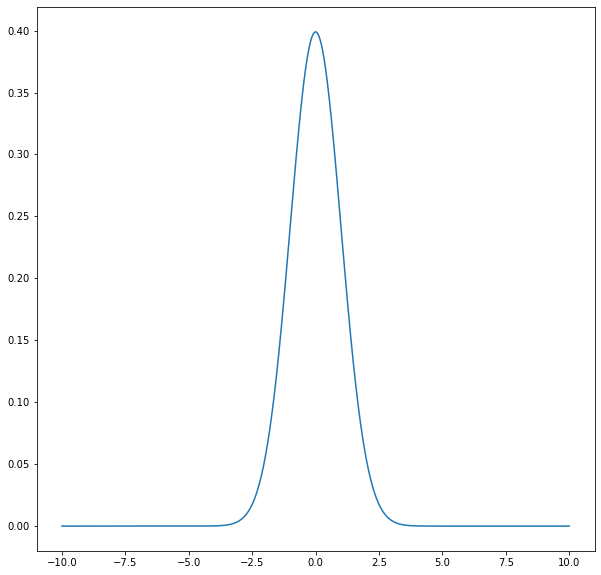

In [62]:
import pylab
# from scipy.stats import norm
from scipy import stats
mean = normalized_df.mean()
std = normalized_df.std(ddof=1)
x = np.linspace(-10,10,1000)
y = norm.pdf(x, loc=mean, scale=std)    # for example
pylab.plot(x,y)
pylab.show()

In [66]:
normalized_df

0      -0.417210
1      -0.417210
2      -0.417210
3      -0.384267
4       0.269958
          ...   
4203   -0.645413
4204   -0.645413
4205   -0.468421
4206   -0.468421
4207   -0.468421
Name: clean_domestic_gross, Length: 4208, dtype: float64

In [67]:
# stats.ttest_ind(df['clean_domestic_gross'])

### Using the clean dataframe to find top performing genre by domestic gross income

In [68]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,theater_date,dvd_date,currency,box_office,runtime,studio_y,year_y,clean_domestic_gross,clean_worldwide_gross,Norm_clean_domestic_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Action,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Adventure,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Fantasy,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
3,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21569509.0,22885836.0,-0.384267
4,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,Biography,14,moneyball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75605492.0,111300835.0,0.269958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,tt3111864,5.0,102,8 Days,8 Days,2014,90.0,Drama,1,8days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.645413
4204,tt3111864,5.0,102,8 Days,8 Days,2014,90.0,Thriller,1,8days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.645413
4205,tt3125324,6.9,14122,Beyond the Lights,Beyond the Lights,2014,116.0,Drama,5,beyondthelights,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14618727.0,14618727.0,-0.468421
4206,tt3125324,6.9,14122,Beyond the Lights,Beyond the Lights,2014,116.0,Music,5,beyondthelights,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14618727.0,14618727.0,-0.468421


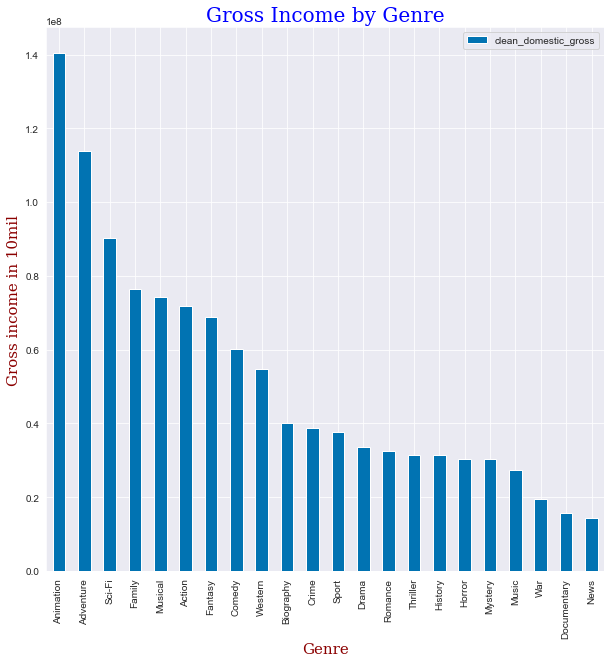

In [115]:
x = df.groupby('genres').mean()[['clean_domestic_gross']].sort_values('clean_domestic_gross', ascending = False)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
x.plot.bar()
plt.title("Gross Income by Genre", fontdict = font1)
plt.xlabel("Genre", fontdict = font2)
plt.ylabel("Gross income in 10mil", fontdict = font2)

plt.show()

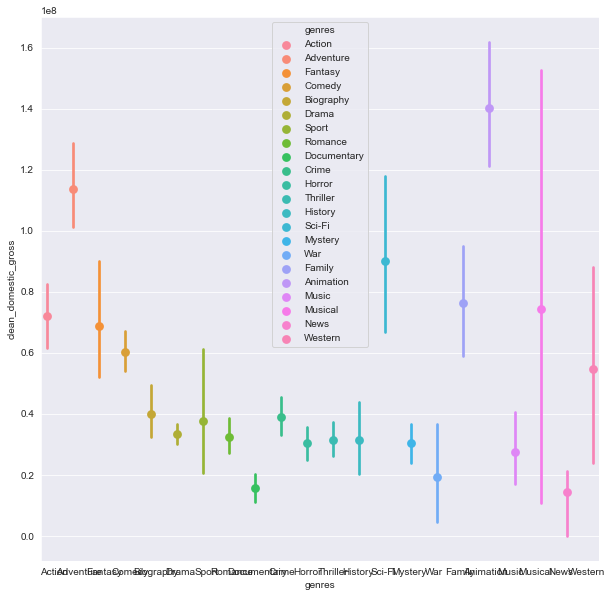

In [93]:
sns.set_style('darkgrid')

ax = sns.pointplot(x= 'genres', y= 'clean_domestic_gross', hue = 'genres',
                   data=df, dodge=True)

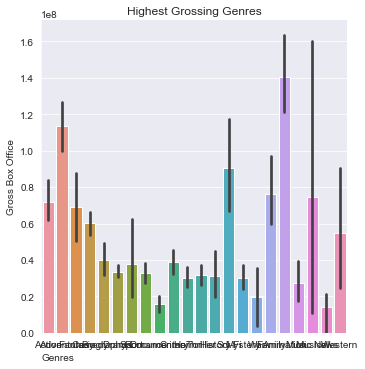

In [105]:
sns.set_style('darkgrid')
sns.set_palette('colorblind')

sns.catplot(
    data=df,
    x= 'genres',
    y='clean_domestic_gross',
    kind='bar'
)
plt.title('Highest Grossing Genres')
plt.xlabel('Genres', loc = 'left')
plt.ylabel('Gross Box Office')
plt.show()

In [69]:
adventures = df[df['genres']=="Adventure"]

actions = df[df['genres']=="Action"]



In [70]:
adventures

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,theater_date,dvd_date,currency,box_office,runtime,studio_y,year_y,clean_domestic_gross,clean_worldwide_gross,Norm_clean_domestic_gross
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Adventure,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
30,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,Adventure,11,reignofassassins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11354230.0,-0.645413
32,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,Adventure,11,reignofassassins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11354230.0,-0.645413
48,tt1524930,6.1,87582,Vacation,Vacation,2015,99.0,Adventure,7,vacation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58884188.0,102306500.0,0.067510
50,tt1524930,6.1,87582,Vacation,Vacation,2015,99.0,Adventure,7,vacation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58884188.0,102306500.0,0.067510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,tt1946502,4.5,1176,UglyDolls,UglyDolls,2019,87.0,Adventure,25,uglydolls,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19894664.0,24644664.0,-0.404544
4181,tt2125435,7.3,77440,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93.0,Adventure,6,beastsofthesouthernwild,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12795746.0,23265132.0,-0.490492
4185,tt2333784,6.1,156432,The Expendables 3,The Expendables 3,2014,126.0,Adventure,11,theexpendables3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39322544.0,209461378.0,-0.169327
4188,tt2386490,7.6,60769,How to Train Your Dragon: The Hidden World,How to Train Your Dragon: The Hidden World,2019,104.0,Adventure,20,howtotrainyourdragonthehiddenworld,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160791800.0,519258283.0,1.301326


In [71]:
actions

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,...,theater_date,dvd_date,currency,box_office,runtime,studio_y,year_y,clean_domestic_gross,clean_worldwide_gross,Norm_clean_domestic_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Action,20,thelegendofhercules,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18848538.0,58953319.0,-0.417210
12,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,Action,26,21jumpstreet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138447667.0,202812429.0,1.030801
15,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,Action,26,21jumpstreet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138447667.0,202812429.0,1.030801
29,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,Action,11,reignofassassins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11354230.0,-0.645413
31,tt1460743,6.9,6990,Reign of Assassins,Jian yu,2010,117.0,Action,11,reignofassassins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11354230.0,-0.645413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,tt2333784,6.1,156432,The Expendables 3,The Expendables 3,2014,126.0,Action,11,theexpendables3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39322544.0,209461378.0,-0.169327
4187,tt2386490,7.6,60769,How to Train Your Dragon: The Hidden World,How to Train Your Dragon: The Hidden World,2019,104.0,Action,20,howtotrainyourdragonthehiddenworld,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160791800.0,519258283.0,1.301326
4193,tt2592614,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,Action,2,residentevilthefinalchapter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26844692.0,314101190.0,-0.320399
4197,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,Action,15,gamenight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69179066.0,117378084.0,0.192152


In [72]:
# alpha 0.05
# mean gross income is higher in action genre than adventure
stats.ttest_ind(actions['clean_domestic_gross'], adventures['clean_domestic_gross']).pvalue/2

1.1963460948367089e-06

In [74]:
animations = df[df['genres']=="Animation"]

In [75]:
musicals = df[df['genres']=="Music"]

In [76]:
# alpha 0.05
# mean gross income is higher in Animation genre than adventure
stats.ttest_ind(animations['clean_domestic_gross'], adventures['clean_domestic_gross']).pvalue/2

0.020066770926806962

In [77]:
df['production_budget'].value_counts()

20000000.0    172
5000000.0     162
10000000.0    152
30000000.0    149
25000000.0    123
             ... 
560000.0        1
30000.0         1
930000.0        1
180000.0        1
546173.0        1
Name: production_budget, Length: 252, dtype: int64

In [78]:
df['clean_domestic_gross'].value_counts()

0.0            549
132422809.0     29
248757044.0     12
21416355.0      12
67505.0         11
              ... 
209028679.0      1
56451232.0       1
20733485.0       1
152449.0         1
44983704.0       1
Name: clean_domestic_gross, Length: 1259, dtype: int64

In [79]:
df['profit'] = df['clean_domestic_gross'] - df['production_budget']

In [80]:
df['profit'].head()

0   -51151462.0
1   -51151462.0
2   -51151462.0
3    13069509.0
4    25605492.0
Name: profit, dtype: float64

<AxesSubplot:xlabel='genres'>

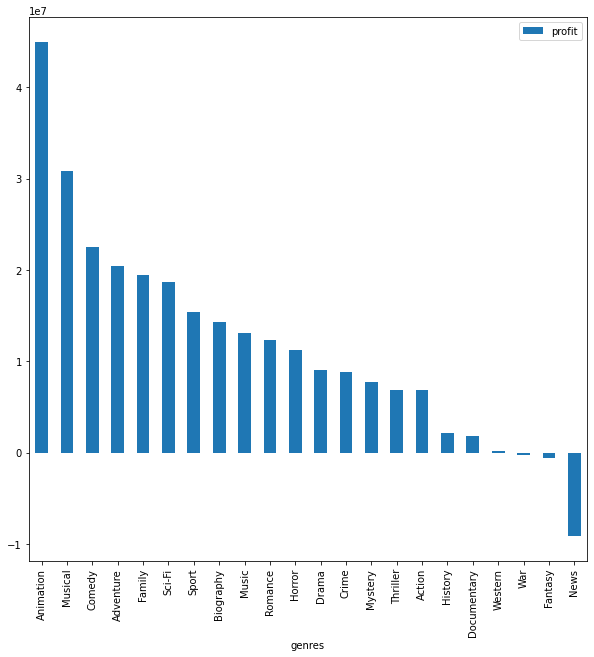

In [81]:
x = df.groupby('genres').mean()[['profit']].sort_values('profit', ascending = False)
x.plot.bar()

In [82]:
animations = df[df['genres']=="Animation"]

In [83]:
musicals = df[df['genres'] == "Music"]

In [84]:
# alpha 0.05
# mean gross income is higher in Animation genre than adventure
stats.ttest_ind(animations['profit'], musicals['profit']).pvalue/2

0.006882610995136657